# Ford GoBike Dataset Exploration
## by Mingmin Wang

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load in dataset as dataframe fbike
fbike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# First 5 lines
fbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#  Overview of column names and data types
fbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Count rows with null values
fbike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# drop rows with null values
fbike = fbike[(~fbike.start_station_id.isnull()) & (~fbike.member_birth_year.isnull())]
 

In [7]:
# %%capture # disable warning

# change the data types
fbike['duration_sec'] = fbike.duration_sec.astype(float)
fbike['start_time'] = pd.to_datetime(fbike['start_time'])
fbike['end_time'] = pd.to_datetime(fbike['end_time'])
fbike['start_station_id'] = fbike.start_station_id.astype(int)
fbike['end_station_id'] = fbike.end_station_id.astype(int)
fbike['member_birth_year'] = fbike.member_birth_year.astype(int)

The cell below is a function used to calculate distance from latitude and longitude.  It take some time to run, so the two cells below were commented out after I finished using it to get the distance:

In [8]:
# # make a function to calculate distance from latitude and longitude, 
# # and then add this new 'distance' column

# # Function based om
# # haversine formula 
# # by ChitraNayal 
# def haversine(lat1, lon1, lat2, lon2): 
	
# 	# changes between latitudes 
# 	# and longitudes 
# 	dLat = (lat2 - lat1) * math.pi / 180.0
# 	dLon = (lon2 - lon1) * math.pi / 180.0

# 	# convert to radians 
# 	lat1 = (lat1) * math.pi / 180.0
# 	lat2 = (lat2) * math.pi / 180.0

# 	# apply haversine formula 
# 	a = (pow(math.sin(dLat / 2), 2) +
# 		pow(math.sin(dLon / 2), 2) *
# 			math.cos(lat1) * math.cos(lat2)); 
# 	rad = 6371
# 	c = 2 * math.asin(math.sqrt(a)) 
# 	return rad * c 


# # add 'distance' column by calling haversine() functioin, distance is in kilometers
# for index, row in fbike.iterrows():
#     fbike.loc[index, 'distance'] = haversine(row['start_station_latitude'], row['start_station_longitude'], 
#                                              row['end_station_latitude'], row['end_station_longitude'])

In [9]:
# # adding tow columns: hour, and weekday
# fbike['hour']=fbike.start_time.dt.hour
# fbike['weekday']=fbike.start_time.dt.weekday

# # save the cleaned dataframe
# fbike.to_csv('fbike_clean.csv')

The clearn version of the data was read in as `fbike_clean`:

In [10]:
fbike_clean=pd.read_csv('fbike_clean.csv')

In [11]:
# Stastistics of numerical variables
fbike_clean.describe()

,Unnamed: 0,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance,hour,weekday
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,91617.270983,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,1.690049,13.456165,2.619953
std,52990.690288,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,1.096957,4.734282,1.808470
min,0.000000,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,0.000000
25%,45733.750000,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,0.910443,9.000000,1.000000
50%,91793.500000,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,1.429829,14.000000,3.000000
75%,137553.250000,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,2.224010,17.000000,4.000000
max,183411.000000,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,69.469241,23.000000,6.000000


In [12]:
fbike_clean.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,hour,weekday
0,0,52185.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,0.544709,17,3
1,2,61854.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2.704545,12,3
2,3,36490.0,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,0.260739,17,3
3,4,1585.0,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2.409301,23,3
4,5,1793.0,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,3.332203,23,3


### Overview of dataset:

In [13]:
# Overview of dataset structure after premilinary data wrangling
print(fbike_clean.shape)
print(fbike_clean.dtypes)
print(fbike_clean.head())

(174952, 20)
Unnamed: 0                   int64
duration_sec               float64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int64
member_gender               object
bike_share_for_all_trip     object
distance                   float64
hour                         int64
weekday                      int64
dtype: object
   Unnamed: 0  duration_sec               start_time                 end_time  \
0           0       52185.0  2019-02-28 17:32:10.145  2019-03-01 08:01:55.975   
1           2       61854.0  2019-02-28 12:13:13.218  2019-03-01 05:24:08.146   
2           3       36490.0  2

### What is the structure of your dataset?

> After data wrangling, the fbike dataframe has 174952 rows and 19 columns; each row is a record of a Ford GoBike renting occurance.  Each column shows the information of that occurance, including duration, start and end time, start and end location, bike ID, station ID, user's type, birth year, and gender, etc.

### What is/are the main feature(s) of interest in your dataset?

> The main feature in this dataset is distribution of the usage of the Ford GoBike among different features (columns).  I am interested in finding out what feature affects the usage of the bike sharing system, and to what extent.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are many interesting features (columns) in this dataset. For example, the `start_time` column, which can tell me during what time of the day, or what day of the week do we have the most rides. The `distance` travled by each renter is also useful to show what kinds of commute are people using Ford GoBike for.
> Are men using the bike more than women? 
> What age groups are using Ford GoBike most frequently?

## Univariate Exploration

### Distribution of the ride duration:

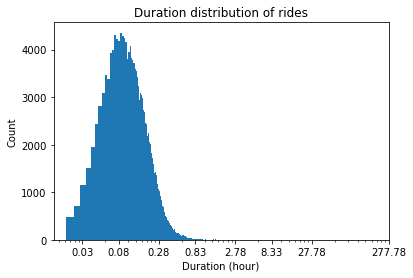

In [14]:
# Distribution of the ride duration
plt.hist(data=fbike_clean.query('distance<10'), x='duration_sec', bins=5000);
plt.xscale('log') # log transformation on the duration time (seconds)
ticks=[100, 300, 1000, 3000, 10000, 30000, 100000, 1000000];
labels = ['{:.2f}'.format(v) for v in np.array(ticks)/3600];
plt.xticks(ticks, labels);

plt.xlabel('Duration (hour)')
plt.ylabel('Count')
plt.title('Duration distribution of rides');

> According to the histogram of duration above, most rides last 0.03 to 0.28 hours, while very few of them last more than 1 hour. This suggests that most users are using the bike for short trips.

### Distribution of distance of bike rides:

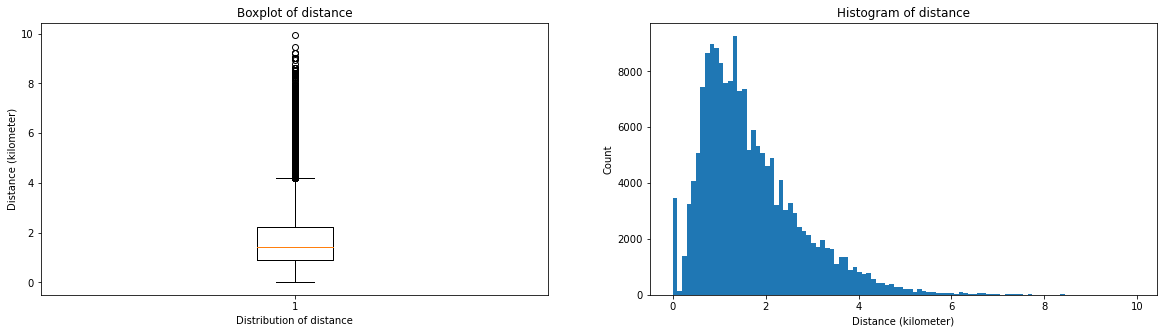

In [15]:
# Distance of bike rides
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1) 
# removing distance larger than 69 km (outliers)
plt.boxplot(data=fbike_clean.query('distance < 10'), x='distance');
plt.xlabel('Distribution of distance')
plt.ylabel('Distance (kilometer)')
plt.title('Boxplot of distance');

plt.subplot(1, 2, 2) 
plt.hist(data=fbike_clean.query('distance < 10'), x='distance', bins=100);
plt.xlabel('Distance (kilometer)')
plt.ylabel('Count')
plt.title('Histogram of distance');

> The bosplot above shows the median of distance is about 1.5 kilometers.  The histogram above shows a right skewed distribution, with most distances distributed between 0 to 4 kilimeters. Very few of the rides last longer than 6 kilimeters.

### Time of the day when bike ride happened:

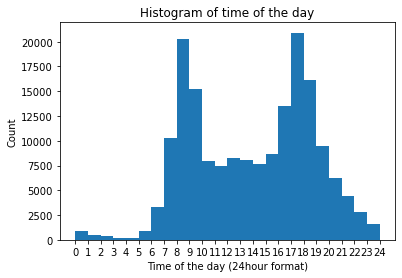

In [16]:
# Time of the day when bike rides happened
bin_edges = np.arange(0, 24+1, 1)

plt.hist(data=fbike_clean, x='hour', bins=bin_edges);
plt.xlabel('Time of the day (24hour format)')
plt.ylabel('Count')
plt.title('Histogram of time of the day');
plt.xticks(np.arange(0, 24+1, 1));


> The distribution of time of the day when the bike usage starts is interesting.  It clearly shows two modes: one during the morning rush hour between 7 to 10 am, another is during the evening rush hour between 5pm to 8pm.  
### User's age distribution:

(1920.0, 2010.0)

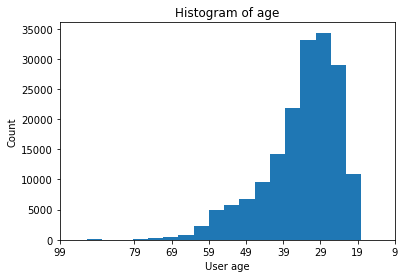

In [17]:
# user's age distribution
plt.hist(data=fbike_clean, x='member_birth_year', bins=30);
plt.xlabel('User age')
plt.ylabel('Count')
plt.title('Histogram of age')


ticks=[1920, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010];
labels = ['{}'.format(v) for v in 2019-np.array(ticks)]
plt.xticks(ticks, labels) # relabel the x axis with ages in stead of birth year
plt.xlim([1920, 2010]) # excluding ages older than 100, whihc could be errors in dataset

> The age distribution among the users shows a left skewed distribution, with 20 to 40 years old being the most active group of people who use the bike.

### Distribution of gender:

Text(0.5, 1.0, 'Distribution of bike share')

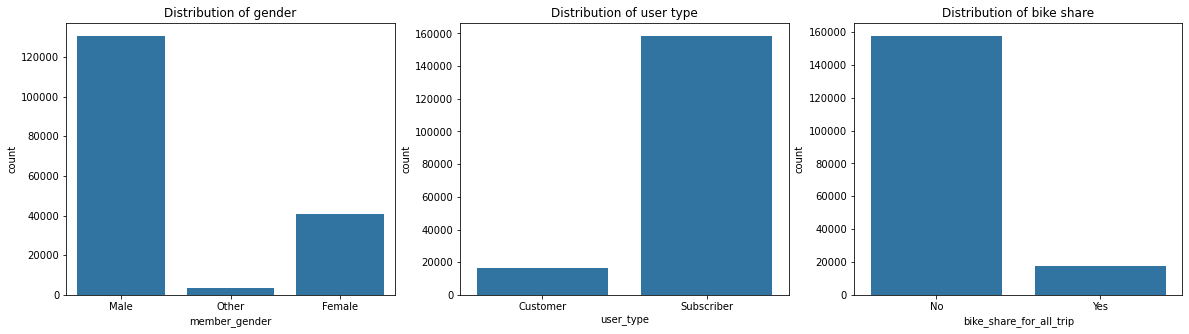

In [18]:
# Distribution of gender
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
base_color=sb.color_palette()[0]
sb.countplot(data=fbike_clean, x='member_gender', color=base_color)
plt.title('Distribution of gender')

plt.subplot(1,3,2)
sb.countplot(data=fbike_clean, x='user_type', color=base_color)
plt.title('Distribution of user type')

plt.subplot(1,3,3)
sb.countplot(data=fbike_clean,x='bike_share_for_all_trip', color=base_color)
plt.title('Distribution of bike share')

> The distibution of gender clear shows men are using the bike almost  three times more frequently compared to women.
Most of the users are subscribers, and most of them  don't share for all trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of duration is close to normal distribution between 0 to 0.8 hours, but it has some outliers with duration longer than 1 hour. I performed log transformation on the duration data, and relabeled the x axis so it shows the duration in hours. The distribution of the start time of the rides are as expected, with two modes corresponding to morning rush and evening rush of the day.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did calculate the ages from the birth year and relabeled the x axis to show ages. The distribution of age of the users show some very large ages such as 120 years old. So I set the x axis limits to show only ages smaller than 99 years old.

## Bivariate Exploration

### Relationship between distance and duration:

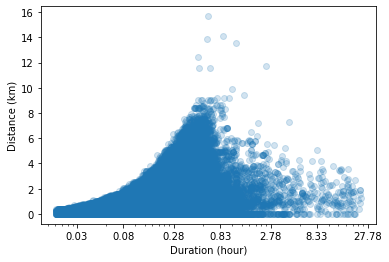

In [19]:
plt.scatter(data=fbike_clean[fbike_clean.distance<60], x='duration_sec', y='distance', alpha=0.2);
plt.xscale('log');
ticks=[100, 300, 1000, 3000, 10000, 30000, 100000];
labels = ['{:.2f}'.format(v) for v in np.array(ticks)/3600];
plt.xticks(ticks, labels);

plt.xlabel('Duration (hour)');
plt.ylabel('Distance (km)');

> The scatter plot of distance vs duration shows a trend that distance increases with duration, although this trend is not very obvious.  There are many overlapping of the data points.

### Relationship between distance and age:

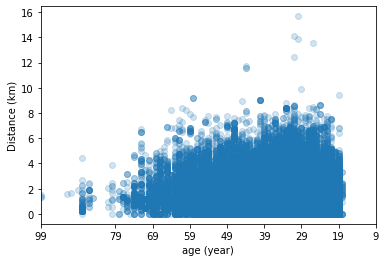

In [20]:
plt.scatter(data=fbike_clean[fbike_clean.distance<60], x='member_birth_year', y='distance', alpha=0.2)
ticks=[1920, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010];
labels = ['{}'.format(v) for v in 2019-np.array(ticks)]
plt.xticks(ticks, labels) # relabel the x axis with ages in stead of birth year
plt.xlim([1920, 2010]) # excluding ages older than 100, whihc could be errors in dataset

plt.xlabel('age (year)')
plt.ylabel('Distance (km)');

> The plot above shows a slight trend that young people tend to travel longer distance than older people, although there are lots of data point overlapping.

### Relationship between start time and age:

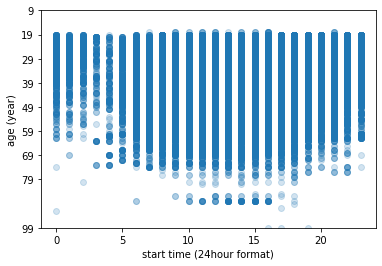

In [21]:
plt.scatter(data=fbike_clean[fbike_clean.distance<60], y='member_birth_year', x='hour', alpha=0.2)
ticks=[1920, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010];
labels = ['{}'.format(v) for v in 2019-np.array(ticks)]
plt.yticks(ticks, labels) # relabel the x axis with ages in stead of birth year
plt.ylim([1920, 2010]) # excluding ages older than 100, whihc could be errors in dataset

plt.ylabel('age (year)')
plt.xlabel('start time (24hour format)');

> The plot above shows fewer activity of older people very early in the morning or late at night, while people younger than 39 show activity through the full 24 hour period.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I plotted the scatter plot of distance vs. duration and the plot of distance vs. age.  It is not what I expected.  I expected longer distance should have longer duration, and younger people should travel longder distance.  It turns out the the relation between distance and duration are complicated, only slightly suggesting that longer duration means longer distance.  This is similar with the distance-age plot.

## Multivariate Exploration

### Relationship between duration and member birth year for different genders:

/home/mingmin/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


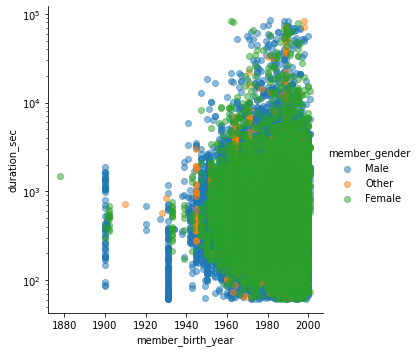

In [22]:
g = sb.FacetGrid(data = fbike_clean[fbike_clean.distance<60], hue = 'member_gender', size = 5)
g.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha=0.5)
plt.yscale('log')
g.add_legend()

> The plot above shows the relationship between duration and age are similar for all genders, with male data points varying more than female data points.

### Relationship between distance and member birth year for different genders and user types:

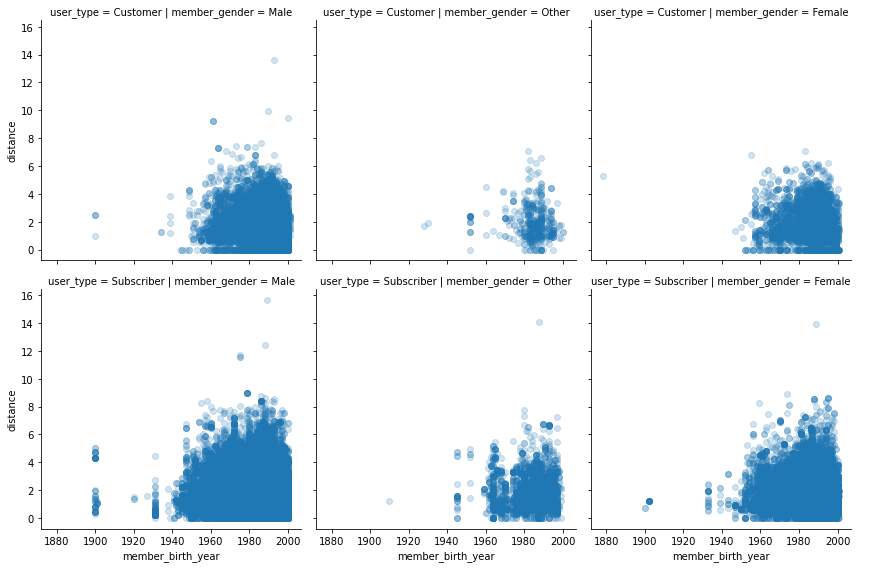

In [23]:
g = sb.FacetGrid(data = fbike_clean[fbike_clean.distance<60], col = 'member_gender', row='user_type', size = 4)
g.map(plt.scatter, 'member_birth_year', 'distance', alpha=0.2)
g.add_legend()

> The relationship between distance and member birth year are similar for all genders and user types, with male data points varying more than female data points

### Location distribution and number of trips:

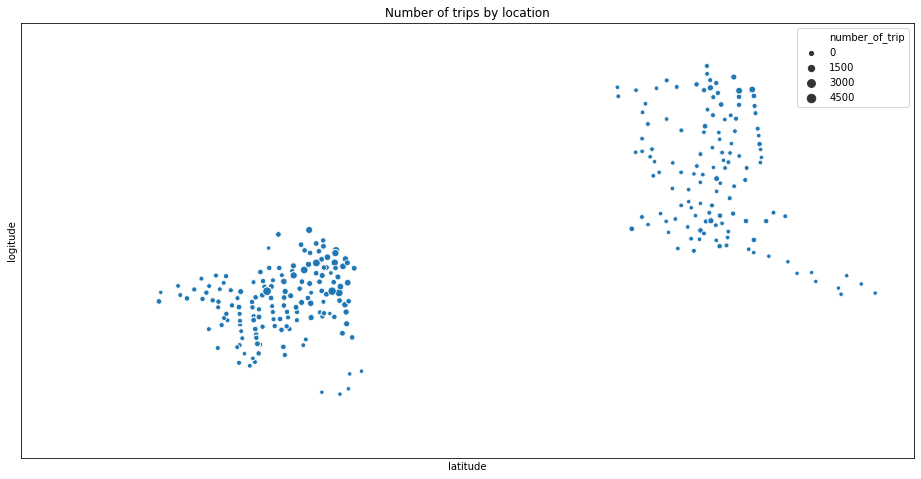

In [56]:
# adding a new column of number of trips
num_of_trip = fbike_clean['start_station_id'].value_counts();
num_of_trip1 = num_of_trip.to_dict();
fbike_clean['number_of_trip']=fbike_clean['start_station_id'].map(num_of_trip1);

#plot number of trips by location
plt.figure(figsize=[16,8]);
sb.scatterplot(data=fbike_clean, x='start_station_longitude', y='start_station_latitude', size='number_of_trip');
plt.ylim([37.7,37.9]);
plt.xlim([-122.5,-122.2]);
plt.xticks([]);
plt.yticks([]);
plt.xlabel('latitude');
plt.ylabel('logitude');
plt.title('Number of trips by location');

> The number of trips by location map above shows that there are more trips happening in the west bay area, whihc is more populated comapred tot the east bay area.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I plotted distance as a function of member birth year, using both gender and user type as the categorical variable.  All plots show not clear trends.  

### Were there any interesting or surprising interactions between features?

> What is surprising to me is that there is not a clear trend of the relationship between distance and birth year, 